In [414]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
# Display the data table for preview

combined_data_df = pd.merge(mouse_data_df, clinical_trial_data_df, how="left", on="Mouse ID")
combined_data_df.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [415]:
combined_data_df.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

## Tumor Response to Treatment

In [509]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
dtv_df = combined_data_df.iloc[:,[1,2,3]]
dtv_df
d_and_t_grouped= dtv_df.groupby(["Drug","Timepoint"]).mean()
d_and_t_grouped


# Convert to DataFrame
# Preview DataFrame
tumor_volume_df= d_and_t_grouped.add_suffix('_Mean').reset_index()
tumor_volume_df


,Drug,Timepoint,Tumor Volume (mm3)_Mean
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [420]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem=  dtv_df.groupby(["Drug","Timepoint"]).sem()
sem
# Convert to DataFrame
# Preview DataFrame
sem_df= sem.add_suffix('_Error').reset_index()
sem_df



,Drug,Timepoint,Tumor Volume (mm3)_Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [510]:
# Minor Data Munging to Re-Format the Data Frames
mean_df= tumor_volume_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)_Mean')
# Preview that Reformatting worked
mean_df
new_mean_df= mean_df.loc[:, ["Capomulin", "Infubinol", "Ketapril","Placebo"]]
new_mean_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [488]:
new_mean_df.shape
new_mean_df.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [489]:
new_mean_df.columns

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')

In [490]:
# Minor Data Munging to Re-Format the Data Frames
final_sem_df= sem_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)_Error')
# Preview that Reformatting worked
final_sem_df
new_sem_df= final_sem_df.loc[:, ["Capomulin", "Infubinol", "Ketapril","Placebo"]]
new_sem_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


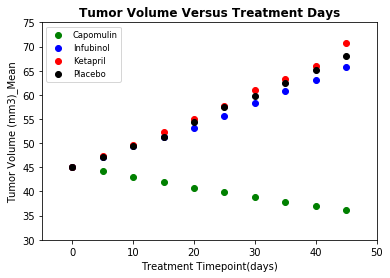

In [491]:
# Generate the Plot 
fig, ax= plt.subplots()
ax1= plt.scatter(new_mean_df.index.values, new_mean_df['Capomulin'], color="g", label= "Capomulin")
ax2= plt.scatter(new_mean_df.index.values, new_mean_df['Infubinol'], color="b", label= "Infubinol")
ax3= plt.scatter(new_mean_df.index.values, new_mean_df['Ketapril'], color="r", label= "Ketapril")
ax4= plt.scatter(new_mean_df.index.values, new_mean_df['Placebo'], color="k", label= "Placebo")
plt.title("Tumor Volume Versus Treatment Days", fontsize=12, fontweight='bold')
plt.xlabel('Treatment Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)_Mean')
plt.legend(loc="upper left", fontsize='small')
plt.xlim(-5,50)
plt.ylim(30,75)
plt.show()

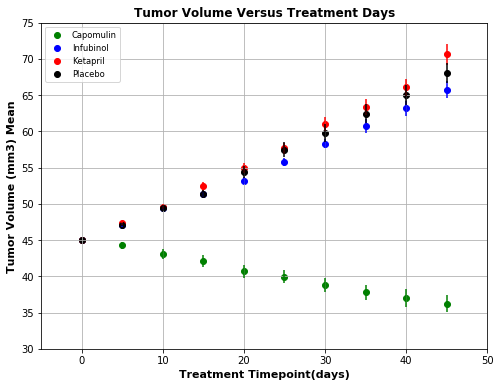

In [492]:
# Generate the Plot (with Error Bars)
fig, ax= plt.subplots(figsize=(8,6))
ax1= plt.scatter(new_mean_df.index.values, new_mean_df['Capomulin'], color="g", label= "Capomulin")
ax1_errorbar= plt.errorbar(new_mean_df.index.values, new_mean_df['Capomulin'],yerr=new_sem_df['Capomulin'], color="g", linestyle='None',label= None)
ax2= plt.scatter(new_mean_df.index.values, new_mean_df['Infubinol'], color="b", label= "Infubinol")
ax2_errorbar= plt.errorbar(new_mean_df.index.values, new_mean_df['Infubinol'],yerr=new_sem_df['Infubinol'], color="b", linestyle='None',label= None)
ax3= plt.scatter(new_mean_df.index.values, new_mean_df['Ketapril'], color="r", label= "Ketapril")
ax3_errorbar= plt.errorbar(new_mean_df.index.values, new_mean_df['Ketapril'],yerr=new_sem_df['Ketapril'], color="r", linestyle='None',label= None)
ax4= plt.scatter(new_mean_df.index.values, new_mean_df['Placebo'], color="k", label= "Placebo")
ax4_errorbar= plt.errorbar(new_mean_df.index.values, new_mean_df['Placebo'],yerr=new_sem_df['Placebo'], color="k", linestyle='None',label= None)
plt.title("Tumor Volume Versus Treatment Days", fontsize=12, fontweight='bold')
plt.xlabel('Treatment Timepoint(days)',fontsize=11, fontweight='bold')
plt.ylabel('Tumor Volume (mm3) Mean', fontsize=11, fontweight='bold')
plt.legend(loc="upper left", fontsize='small')
plt.xlim(-5,50)
plt.ylim(30,75)
plt.grid()
plt.savefig('resources/tumor_time.png')
plt.show()

## Metastatic Response to Treatment

In [493]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = combined_data_df.iloc[:,[1,2,4]]
mean_met
mean_met_grouped= mean_met.groupby(["Drug","Timepoint"]).mean()
mean_met_grouped
# Convert to DataFrame
# Preview DataFrame
met_df= mean_met_grouped.add_suffix('_Mean').reset_index()
met_df


,Drug,Timepoint,Metastatic Sites_Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [494]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met= mean_met.groupby(["Drug","Timepoint"]).sem()
sem_met
# Convert to DataFrame
# Preview DataFrame
sem_met_df= sem_met.add_suffix('_Error').reset_index()
sem_met_df

,Drug,Timepoint,Metastatic Sites_Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [495]:
# Minor Data Munging to Re-Format the Data Frames
sem_met_error_df= sem_met_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Metastatic Sites_Error')
# Preview that Reformatting worked
sem_met_error_df
new_sem_met_error_df= sem_met_error_df.loc[:, ["Capomulin", "Infubinol", "Ketapril","Placebo"]]
new_sem_met_error_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [496]:
# Minor Data Munging to Re-Format the Data Frames
met_average_df= met_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Metastatic Sites_Mean')
# Preview that Reformatting worked
met_average_df
new_met_average_df= met_average_df.loc[:, ["Capomulin", "Infubinol", "Ketapril","Placebo"]]
new_met_average_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


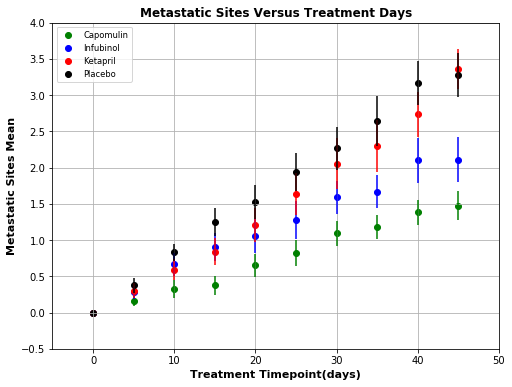

In [497]:
# Generate the Plot (with Error Bars)
fig, ax= plt.subplots(figsize=(8,6))
ax1= plt.scatter(new_met_average_df.index.values, new_met_average_df['Capomulin'], color="g", label= "Capomulin")
ax1_error= plt.errorbar(new_met_average_df.index.values, new_met_average_df['Capomulin'],yerr=new_sem_met_error_df['Capomulin'], color="g", label= None, linestyle='None')
ax2= plt.scatter(new_met_average_df.index.values, new_met_average_df['Infubinol'], color="b", label= "Infubinol")
ax2_error= plt.errorbar(new_met_average_df.index.values, new_met_average_df['Infubinol'],yerr=new_sem_met_error_df['Infubinol'], color="b", label= None, linestyle='None')
ax3= plt.scatter(new_met_average_df.index.values, new_met_average_df['Ketapril'], color="r", label= "Ketapril")
ax3_error= plt.errorbar(new_met_average_df.index.values, new_met_average_df['Ketapril'],yerr=new_sem_met_error_df['Ketapril'], color="r", label= None, linestyle='None')
ax4= plt.scatter(new_met_average_df.index.values, new_met_average_df['Placebo'], color="k", label= "Placebo")
ax4_error= plt.errorbar(new_met_average_df.index.values, new_met_average_df['Placebo'],yerr=new_sem_met_error_df['Placebo'], color="k", label= None, linestyle='None')
plt.title("Metastatic Sites Versus Treatment Days", fontsize=12, fontweight='bold')
plt.xlabel('Treatment Timepoint(days)', fontsize=11, fontweight='bold')
plt.ylabel('Metastatic Sites Mean', fontsize=11, fontweight='bold')
plt.legend(loc="upper left", fontsize='small')
plt.xlim(-5,50)
plt.ylim(-.5,4)
plt.grid()
# Save the Figure
plt.savefig('resources/metastaticsites.png')
# Show the Figure
plt.show()


## Survival Rates

In [498]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_df = combined_data_df.iloc[:,[0,1,2]]
mouse_df
mouse_grouped= mouse_df.groupby(["Drug","Timepoint"]).count()
mouse_grouped
# Convert to DataFrame
# Preview DataFrame
final_mouse_df= mouse_grouped.add_suffix('_Counts').reset_index()
final_mouse_df

,Drug,Timepoint,Mouse ID_Counts
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [499]:
# Minor Data Munging to Re-Format the Data Frames
final_mouse_reform_df= final_mouse_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Mouse ID_Counts')
final_mouse_reform_df
# Preview the Data Frame
final2_mouse_reform_df= final_mouse_reform_df.loc[:, ["Capomulin", "Infubinol", "Ketapril","Placebo"]]
final2_mouse_reform_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [500]:
final2_mouse_reform_df['Capomulin Survival']= final2_mouse_reform_df['Capomulin']/25*100
final2_mouse_reform_df['Infubinol Survival']= final2_mouse_reform_df['Infubinol']/25*100
final2_mouse_reform_df['Ketapril Survival']= final2_mouse_reform_df['Ketapril']/25*100
final2_mouse_reform_df['Placebo Survival']= final2_mouse_reform_df['Placebo']/25*100
final2_mouse_reform_df

Drug,Capomulin,Infubinol,Ketapril,Placebo,Capomulin Survival,Infubinol Survival,Ketapril Survival,Placebo Survival
Timepoint,,,,,,,,
0,25,25,25,25,100.0,100.0,100.0,100.0
5,25,25,23,24,100.0,100.0,92.0,96.0
10,25,21,22,24,100.0,84.0,88.0,96.0
15,24,21,19,20,96.0,84.0,76.0,80.0
20,23,20,19,19,92.0,80.0,76.0,76.0
25,22,18,19,17,88.0,72.0,76.0,68.0
30,22,17,18,15,88.0,68.0,72.0,60.0
35,22,12,17,14,88.0,48.0,68.0,56.0
40,21,10,15,12,84.0,40.0,60.0,48.0


In [501]:
survival_df= final2_mouse_reform_df.loc[:, ["Capomulin Survival", "Infubinol Survival", "Ketapril Survival","Placebo Survival"]]
survival_df

Drug,Capomulin Survival,Infubinol Survival,Ketapril Survival,Placebo Survival
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


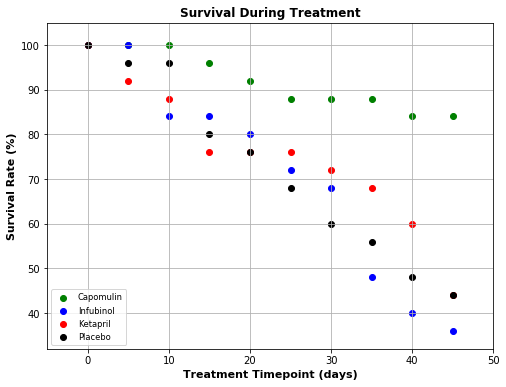

In [502]:
# Generate the Plot (Accounting for percentages)
fig, ax= plt.subplots(figsize=(8,6))
ax1= plt.scatter(survival_df.index.values, survival_df['Capomulin Survival'], color="g", label= "Capomulin")
ax2= plt.scatter(survival_df.index.values, survival_df['Infubinol Survival'], color="b", label= "Infubinol")
ax3= plt.scatter(survival_df.index.values, survival_df['Ketapril Survival'], color="r", label= "Ketapril")
ax4= plt.scatter(survival_df.index.values, survival_df['Placebo Survival'], color="k", label= "Placebo")
plt.title("Survival During Treatment", fontsize=12, fontweight='bold')
plt.xlabel('Treatment Timepoint (days)', fontsize=11, fontweight='bold')
plt.ylabel('Survival Rate (%)', fontsize=11, fontweight='bold')
plt.legend(loc="lower left", fontsize='small')
plt.xlim(-5,50)
plt.ylim(32,105)
plt.grid()
# Save the Figure
plt.savefig('resources/Survival Rates.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [503]:
new_mean_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [504]:
# Calculate the percent changes for each drug
(new_mean_df.iloc[-1] - new_mean_df.iloc[0])/new_mean_df.iloc[-1]*100
# Display the data to confirm


Drug
Capomulin   -24.185502
Infubinol    31.564725
Ketapril     36.317412
Placebo      33.905256
dtype: float64

In [505]:
# Calculate the percent changes for each drug
tumor_percent_chg= (new_mean_df.iloc[-1] - new_mean_df.iloc[0])/new_mean_df.iloc[-1]*100
# Display the data to confirm

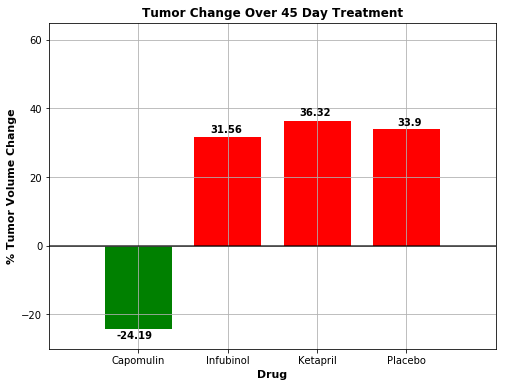

In [506]:
# Store all Relevant Percent Changes into a Tuple
percent_changes= (
tumor_percent_chg['Capomulin'],
tumor_percent_chg['Infubinol'],
tumor_percent_chg['Ketapril'],
tumor_percent_chg['Placebo'])

# Plot the figure
fig, ax = plt.subplots(figsize=(8,6))
ind = np.arange(len(percent_changes))
width = 0.75
rectsPass = ax.bar(ind[0], percent_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], percent_changes[1:], width, color='red')
plt.title("Tumor Change Over 45 Day Treatment", fontsize=12, fontweight='bold')
plt.xlabel('Drug', fontsize=11, fontweight='bold')
plt.ylabel("% Tumor Volume Change", fontsize=11, fontweight='bold')
plt.xlim(-1,4)
plt.ylim(-30,65)
plt.grid()
labels= ['Capomulin','Infubinol','Ketapril','Placebo']
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(labels)
plt.hlines(0,-1,5, alpha=0.8)
plt.text(-0.25,-27, -24.19, fontsize=10, fontweight= 'bold')
plt.text(0.8,33, 31.56, fontsize=10, fontweight= 'bold')
plt.text(1.8,38, 36.32, fontsize=10, fontweight= 'bold')
plt.text(2.9,35, 33.90, fontsize=10, fontweight= 'bold')

# Show the Figure
fig.show()
#Save the figure
plt.savefig('resources/Tumor Change.png')